In [2]:
# imports from custom library
import sys
sys.path.append('../../../')
import autograd.numpy as np
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
datapath = '../../../mlrefined_datasets/nonlinear_superlearn_datasets/'
%matplotlib notebook

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# Deep feedforward neural networks

Press the button 'Toggle code' below to toggle code on and off for entire this presentation.

In [3]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is eåxported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

Unlike polynomials and other fixed kernel bases, each element of a neural network basis has internal parameters that can be tuned to change the shape of the basis function considerably. In our general introduction to nonlinear supervised learning we described *single-layer* network elements, which are constructed by shoving a linear combination of input through a single nonlinear function like $\text{tanh}$ or the ReLU function. In this post we detail multi-layer networks - often called *deep feedforward neural networks*.  We begin by describing deep networks in the context of our previous discussion, as a particular catalog of nonlinear functions used for nonlinear supervised learning problems. We then turn to describe these network elements from a computational perspective, so that we can more easily see how to effectively compute with them. Finally we briefly review the history of neural networks. This helps shed light on the specific nomenclature used with neural networks. 

# 1. Neural network basis functions

## 1.1 Single-input single-layer basis functions

We begin with the simplest neural network basis function: a single-layer basis with scalar input taking the form 

\begin{equation}
f\left(x\right)=a\left(w_0+w_1\,x\right)
\end{equation}

- $a\left(\cdot\right)$ is the nonlinear *activation function*. Popular choices include $\text{tanh}(\cdot)$ and $\text{max}\left(0,\cdot\right)$.

- $w_0$ and $w_1$ are tunable weights.

- Because each single-layer network function has *tunable internal parameters* a single element can take on a variety of shapes.

<hr>

#### <span style="color:#a50e3e;">Example 1. </span> Single-layers basis elements with $\text{tanh}$ activation 

In the Python cell below we plot four instances of a single $\text{tanh}(\cdot)$ element, i.e.,

\begin{equation}
f\left(x\right)=\text{tanh}\left(w_0+w_1\,x\right)
\end{equation}

In each instance the internal parameters $w_0$ and $w_1$ have been set randomly, giving each instance a distinct shape.

<IPython.core.display.Javascript object>


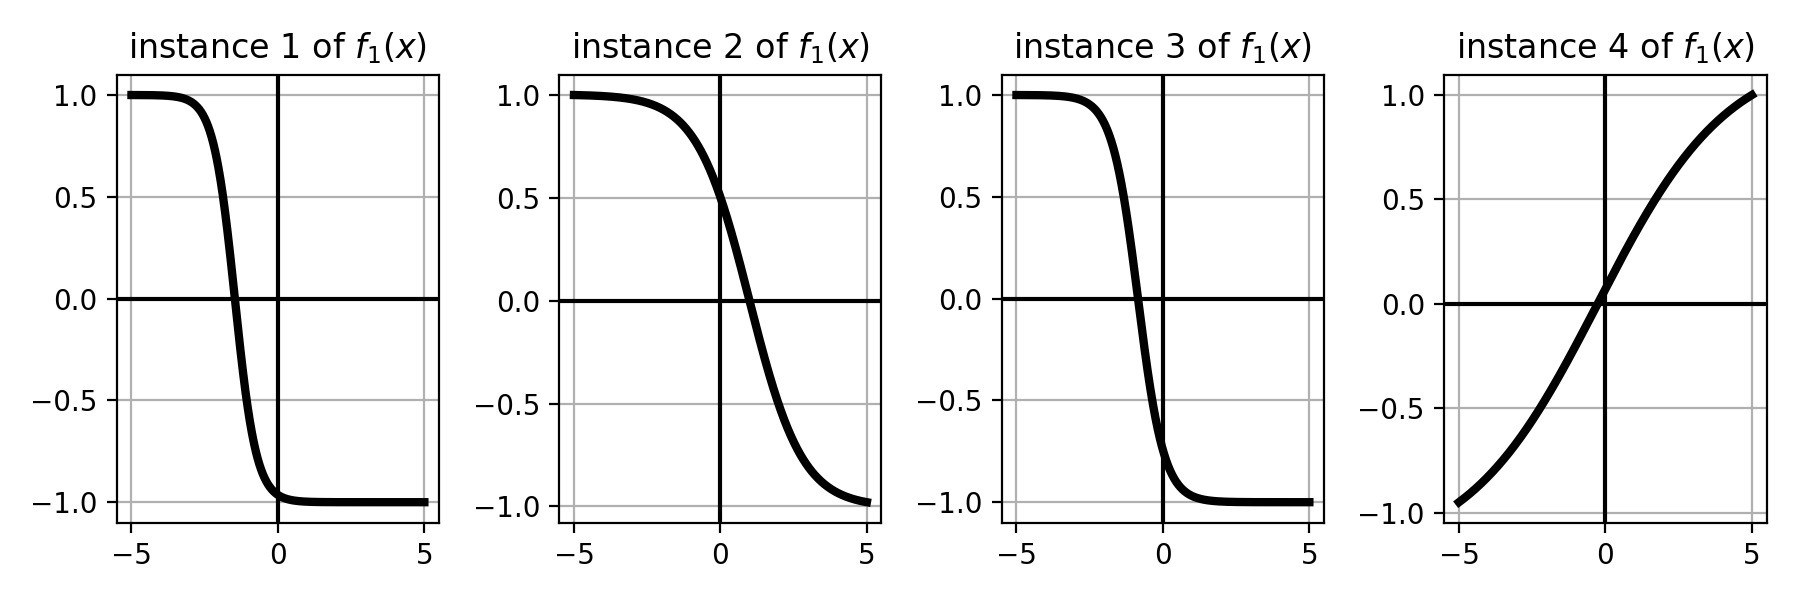

In [4]:
# import Draw_Bases class for visualizing various basis element types
demo = nonlib.DrawBases.Visualizer()

# plot the first 4 elements of the polynomial basis
demo.show_1d_net(num_layers = 1, activation = 'tanh')

<hr>

#### <span style="color:#a50e3e;">Example 2. </span> Single-layers basis elements with ReLU activation 

Using the ReLU activation, a single element in (1) takes the form

\begin{equation}
f\left(x\right)=\text{max}\left(0,w_0+w_1\,x\right)
\end{equation}

In the Python cell below we plot four instances of a such a ReLU element. Again, the internal parameters in each instance are chosen randomly. 

<IPython.core.display.Javascript object>


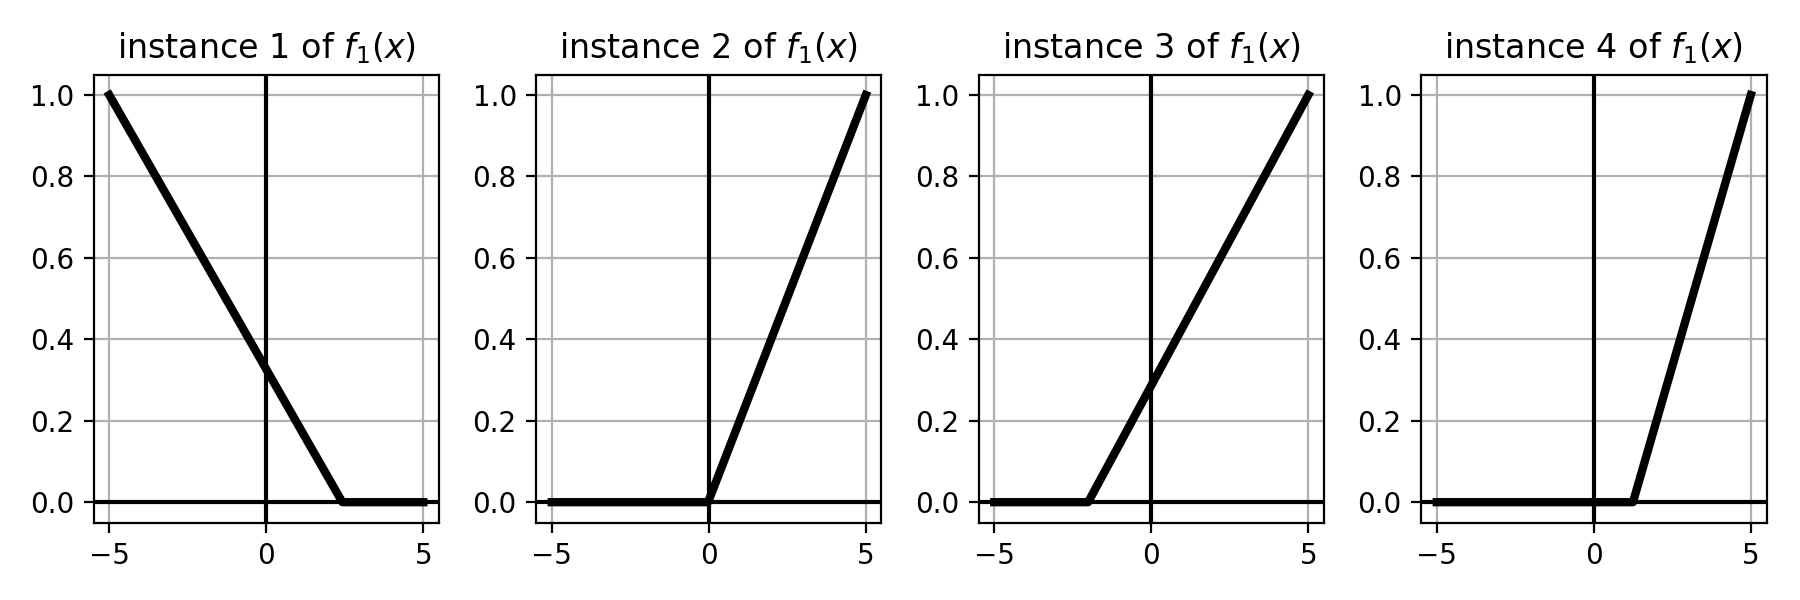

In [14]:
# import Draw_Bases class for visualizing various basis element types
demo = nonlib.DrawBases.Visualizer()

# plot the first 4 elements of the polynomial basis
demo.show_1d_net(num_layers = 1, activation = 'relu')

<hr>

## 1.2 Single-input multi-layer basis functions

More flexible basis functions can be constructed via summation and composition of multiple activation functions.

We take a weighted sum of single-layer basis functions (plus a bias weight) and pass the result through an activation function of the same kind, to get a 2-layer basis function:

\begin{equation}
f\left(x\right)=a\left(w^{\left(1\right)}_{0}+\underset{i}{\sum}{w^{\left(1\right)}_{i}}\,a\left(w^{\left(2\right)}_{i,0}+w^{\left(2\right)}_{i,1}\,x\right)\right)
\end{equation}

Superscripts indicate the layer each internal parameter belongs to. 

The more complex nature of a 2-layer basis function, compared to the relatively simple form of its single-layer counterpart in equation (1), suggests that 2-layer basis elements can be far more diverse in shape. Example 3 below confirms this proposition. 

<hr>

#### <span style="color:#a50e3e;">Example 3. </span> 2-layer basis elements with $\text{tanh}$ activation 

In the Python cell below we show four instances of the 2-layer basis elements in equation (4) with $\text{tanh}$ as activation function. In each instance all internal parameters are set randomly. 

<IPython.core.display.Javascript object>


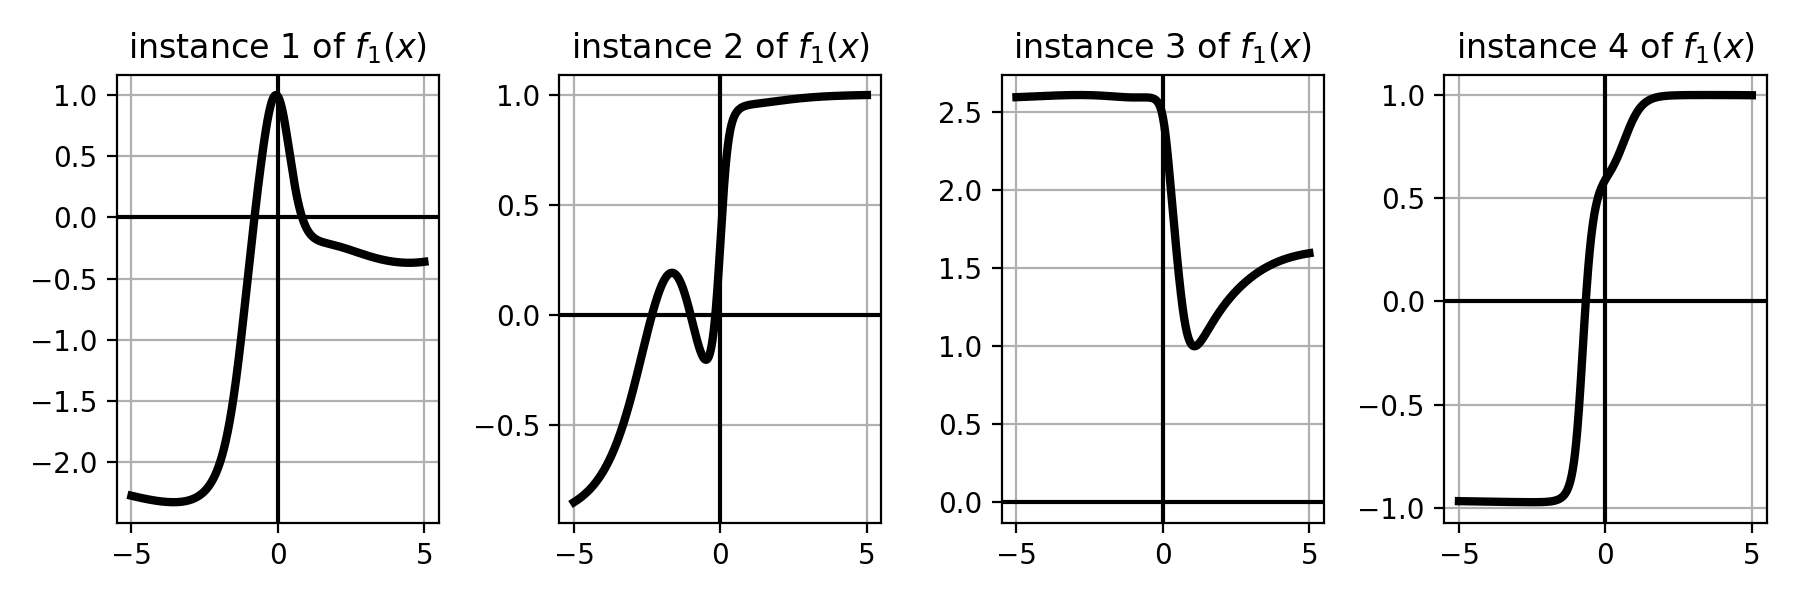

In [39]:
# import Draw_Bases class for visualizing various basis element types
demo = nonlib.DrawBases.Visualizer()

# plot the first 4 elements of the polynomial basis
demo.show_1d_net(num_layers = 2,activation = 'tanh')

<hr>

To achieve even greater flexibility we can simply repeat the summation/composition procedure.

A 3-layer basis function:

\begin{equation}
f\left(x\right)=a\left(w^{\left(1\right)}_{0}+\underset{i}{\sum}{w^{\left(1\right)}_{i}}\,a\left(w^{\left(2\right)}_{i,0}+\underset{j}{\sum}{w^{\left(2\right)}_{i,j}}\,a\left(w^{\left(3\right)}_{j,0}+w^{\left(3\right)}_{j,1}\,x\right)\right)\right)
\end{equation}

This procedure can be repeated to produce basis elements with an arbitrary number of layers.

Currently the convention is to refer to a basis element with three or more layers as a *deep* neural network basis.

<hr>

#### <span style="color:#a50e3e;">Example 4. </span> 10-layer basis elements with $\text{tanh}$ activation 

In the Python cell below we show four instances of neural network basis functions with $10$ layers. Again, in each instance all internal parameters are set randomly. 

<IPython.core.display.Javascript object>


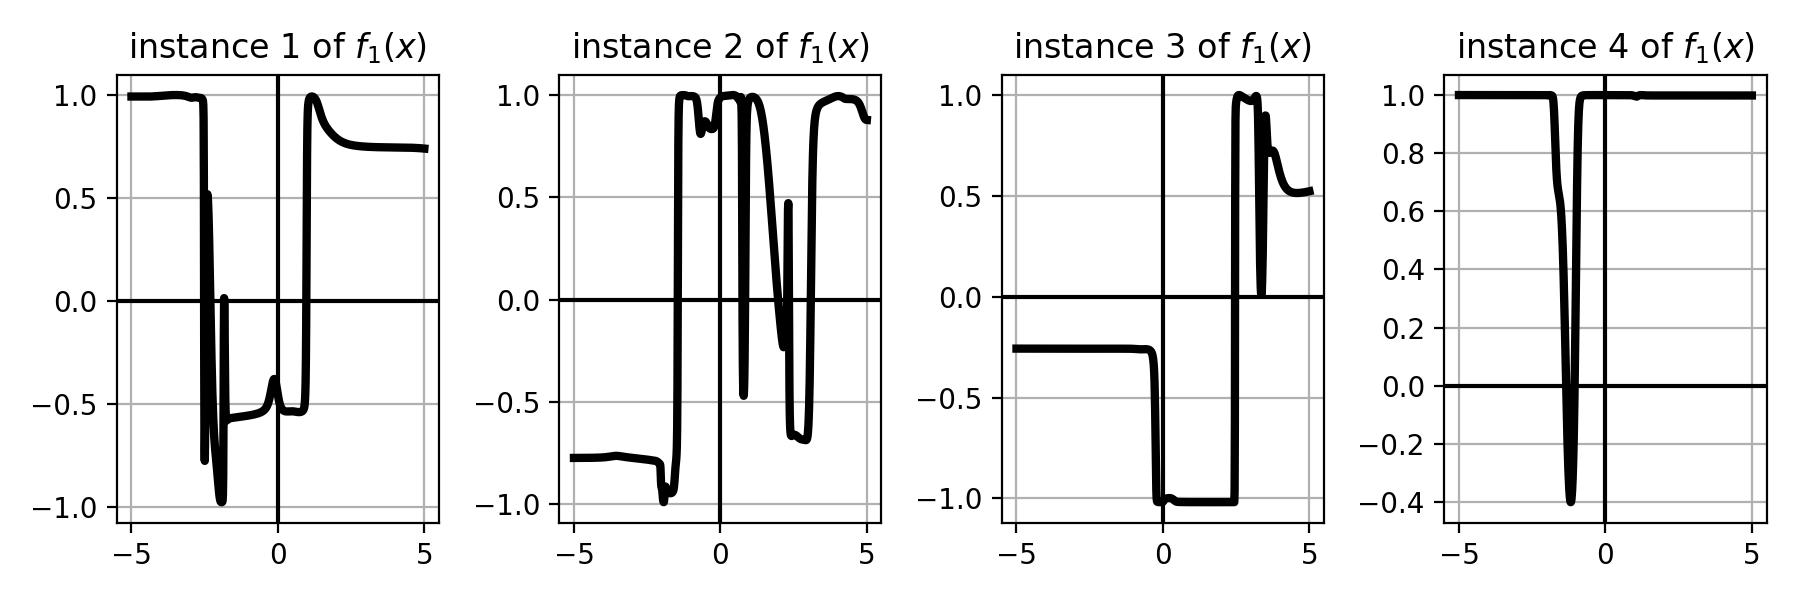

In [42]:
# import Draw_Bases class for visualizing various basis element types
demo = nonlib.DrawBases.Visualizer()

# plot the first 4 elements of the polynomial basis
demo.show_1d_net(num_layers = 10, activation = 'tanh')

<hr>

## 1.3 multi-input multi-layer basis functions

Extending the definition of neural network basis functions to allow for multiple inputs is straightforward: each input dimension gets its own tunable parameter. 

For example: a 3-layer basis with $N$ dimensional input

\begin{equation}
f\left(x_1,x_2,\ldots,x_N\right)=a\left(w^{\left(1\right)}_{0}+\underset{i}{\sum}{w^{\left(1\right)}_{i}}\,a\left(w^{\left(2\right)}_{i,0}+\underset{j}{\sum}{w^{\left(2\right)}_{i,j}}\,a\left(w^{\left(3\right)}_{j,0}+\underset{n}{\sum}w^{\left(3\right)}_{j,n}\,x_n\right)\right)\right)
\end{equation}

## 2. Feedforward neural networks

Feedforward neural networks refer to nonlinear regressors or classifiers built using neural network basis functions. 

For instance: a 3-layer regression network is given below where $f_m$'s are 3-layer basis functions. 

\begin{equation}
\text{predict}\left(x_1,x_2,\ldots,x_N\right)=w_{0}+\underset{m}{\sum}{w_{m}\,\,f_m\left(x_1,x_2,\ldots,x_N\right)}
\end{equation}

Lets write down the full algebraic form: 

\begin{equation}
w_0+\underset{u_1=1}{\overset{U_1}{\sum}}w_{u_1}\,a\left(w^{\left(1\right)}_{u_1,0}+\underset{u_2=1}{\overset{U_2}{\sum}}{w^{\left(1\right)}_{u_1,u_2}}\,a\left(w^{\left(2\right)}_{u_2,0}+\underset{u_3=1}{\overset{U_3}{\sum}}{w^{\left(2\right)}_{u_2,u_3}}\,a\left(w^{\left(3\right)}_{u_3,0}+\underset{n=1}{\overset{N}{\sum}}w^{\left(3\right)}_{u_3,n}\,x_n\right)\right)\right)
\end{equation}

As one can clearly see in (8), the algebraic form of deep neural nets becomes increasingly complex as we add more and more layers. Therefore it is helpful to re-notate more methodically, so as to write them in a less cumbersome manner. This will also help us significantly simplify neural nets' associated computation graphs which are key to understanding how computation flows in such complicated functions. We now see how a proper re-organization of inputs and weights allows us to write the 3-layer neural net in (8) more conveniently.

There has to be a better way to do this!

### Renotate:

\begin{equation}
\mathbf{x}=\left[\begin{array}{c}
1\\
x_{1}\\
\vdots\\
x_{N}
\end{array}\right], \,\,
\mathbf{w}_{0}=\left[\begin{array}{c}
w_{0}\\
w_{1}\\
\vdots\\
w_{U_1}
\end{array}\right], \,\,
\mathbf{W}_{k}=\left[\begin{array}{cccc}
w_{1,0}^{\left(k\right)} & w_{2,0}^{\left(k\right)} & \cdots & w_{U_{k},0}^{\left(k\right)}\\
w_{1,1}^{\left(k\right)} & w_{2,1}^{\left(k\right)} & \cdots & w_{U_{k},1}^{\left(k\right)}\\
\vdots & \vdots & \ddots & \vdots\\
w_{1,U_{k+1}}^{\left(k\right)} & w_{2,U_{k+1}}^{\left(k\right)} & \cdots & w_{U_{k},U_{k+1}}^{\left(k\right)}
\end{array}\right],\,\,
\mathbf{a}\left(\mathbf{v}\right)=\left[\begin{array}{c}
1\\
a\left(v_{1}\right)\\
\vdots\\
a\left(v_{d}\right)
\end{array}\right]
\end{equation}

<strong>scalar notation:</strong>

\begin{equation}
w_0+\underset{u_1=1}{\overset{U_1}{\sum}}w_{u_1}\,a\left(w^{\left(1\right)}_{u_1,0}+\underset{u_2=1}{\overset{U_2}{\sum}}{w^{\left(1\right)}_{u_1,u_2}}\,a\left(w^{\left(2\right)}_{u_2,0}+\underset{u_3=1}{\overset{U_3}{\sum}}{w^{\left(2\right)}_{u_2,u_3}}\,a\left(w^{\left(3\right)}_{u_3,0}+\underset{n=1}{\overset{N}{\sum}}w^{\left(3\right)}_{u_3,n}\,x_n\right)\right)\right)
\end{equation}

<strong>vector/matrix notation:</strong>

\begin{equation}
\mathbf{w}_0^T\,\mathbf{a}\left(\mathbf{W}_1^T\, \mathbf{a}\left(\mathbf{W}_{2}^T\,\mathbf{a}\left(\mathbf{W}_{3}^T\,\mathbf{x}\right)\right)\right)
\end{equation}

<figure>
<img src="../../../mlrefined_images/nonlinear_superlearn_images/computation_graph_3_layer.png" width="80%" height="auto"/>
</figure>

In general, a neural network regressor with $L$ layers takes the form:

\begin{equation}
\text{predict}\left(\mathbf{x}\right)=\mathbf{w}_0^T\,\mathbf{a}\left(\mathbf{W}_1^T\, \mathbf{a}\,\left(\,\cdots\,\mathbf{W}_{L-1}^T\,\mathbf{a}\left(\mathbf{W}_{L}^T\,\mathbf{x}\right)\right)\right)
\end{equation}

<figure>
<img src="../../../mlrefined_images/nonlinear_superlearn_images/L_layer_network_compact.png" width="80%" height="auto"/>
</figure>

The recursive nature of deep networks in equation (14) allows for their quick and easy implementation in Python, as shown in the code cell below.

In [2]:
import numpy as np

# x is the N-dimensional input array
# L is the number of layers in the network
# W is a dictionary of L weight matrices, one for each layer 
# w0 is a weight vector

def FFNN(x, L, W, w0):
    
    in_put = np.append([1], x)
    
    for j in range(L,0,-1):
        in_put = np.dot(W[str(j)].T, in_put)
        out_put = np.tanh(in_put)
        out_put = np.append([1], out_put)

    return np.dot(w0.T, out_put)

def predict(x, L, W, w0):
    
    in_put = np.append([1], x)
    
    for j in range(L,0,-1):
        in_put = np.dot(W[str(j)].T, in_put)
        out_put = np.tanh(in_put)
        out_put = np.append([1], out_put)

    return np.dot(w0.T, out_put)

#  3. Neural networks: the origin of the nomenclature* 

Recall that neural networks were initially introduced in our first post on nonlinear supervised learning series as a special catalog of basis functions (along with others such as polynomial and tree bases). We then saw how to represent and combine these basis functions - both algebraically and pictorially (using computational graphs) - in order to create neural networks with arbitrary number of layers. But where does the rather peculiar name *neural network* come from? Why is the nonlinear function - at the heart of every neural network - called the *activation function*? 

In this Section we answer these questions and more, by exploring neural networks' nomenclature from a historical perspective.

## 3.1 An ambitious quest to model the human brain 

Ever since Hippocrates argued, over two millennia ago, that the brain was 'the seat of the mind,' scientists have been studying it in attempt to unlock the secrets of human intelligence. After all, *Artificial Intelligence* would be long solved if we truly understood how human intelligence worked. Beginning in the 1940s and 50s, a group of psychologists and neuroscientists started to propose mathematical models for how neurons (brain cells) are connected and operate inside the brain [[1,2]](#bib_cell), culminating in the introduction of the *perceptron* model [[3]](#bib_cell) in 1957.

In Figure 3 we show a comparative illustration of a *biological* neuron (left panel) along with what is believed to be  a simplistic mathematical model of it, commonly referred to as an *artificial* neuron (right panel). The biological neuron on the left consists of three main parts: *dendrites* (the neuron's receivers), a *soma* (the cell body that processes incoming electrical impulses), and an *axon* (the neuron's transmitter). Closely mimicking this biological structure, the artificial neuron too comprises a set of dendrite-like edges, each taking an input and multiplying it by a weight assigned to that edge. These weighted inputs are summed up after going through a *summation unit* (shown by a small hollow circle) and the result is subsequently fed to and processed by an *activation unit* (shown by a large blue circle). Finally, the output of the activation unit is transmitted to the outside via the output edge (akin to the axon). 

<figure>
<img src="../../../mlrefined_images/nonlinear_superlearn_images/biological_artificial.png" width="100%" height="auto"/>
<figcaption> <strong>Figure 3:</strong> <em> (left) A biological neuron. (right) An artificial neuron - a suggested mathematical model for the biological neuron.</em>
</figcaption>
</figure>

From a biological perspective, neurons are believed to remain inactive until the net input to the soma reaches a given threshold, at which point the neuron gets 'activated' and fires an electrical pulse. This is why the function modeling internal processes inside the soma is referred to as the *activation* function. 

##  3.2 From a single neuron to a neural network

A biological neuron is just a single cell, of which there are roughly $10^{11}$ inside the human brain. Thus to perform any cognitive task, we need a sizable series of interconnected neurons - also known as a *neural network* - to interact. For example somewhere between $10^{5}$ to $10^{6}$ neurons are required to render a realistic image of our visual surroundings [[4]](#bib_cell).  
 
Motivated by biological neural networks, artificial neural networks are created by arranging artificial neurons in a series of *layers*. Figure 4 illustrates a neural network with two layers, each consisting of $9$ and $11$ artificial neurons or *units*, respectively.

<figure>
<img src="../../../mlrefined_images/nonlinear_superlearn_images/2_layer_neural_network.png" width="80%" height="auto"/>
<figcaption> <strong>Figure 4:</strong> <em> A fully-connected feed-forward artificial neural network with two hidden layers. </em>
</figcaption>
</figure>

The network shown in Figure 4 is referred to, more verbosely, as a fully-connected feed-forward artificial neural network with two hidden layers: *fully-connected* because each neuron is connected to all neurons in the previous and next layers, and *feed-forward* because the flow of information is always in the forward direction, from the inputs on the left to the output on the right. Because an outside viewer supposedly only sees these inputs and output, the in-between layers are sometimes called *hidden* layers. 

Notice, as shown in Figure 5, a computation graph is a simpler and more useful way of representing the neural network in Figure 4. 

<figure>
<img src="../../../mlrefined_images/nonlinear_superlearn_images/2_layer_network_compact.png" width="80%" height="auto"/>
<figcaption> <strong>Figure 5:</strong> <em> Computation graph for the network shown in Figure 4. Here $\mathbf{W}_2$ is a matrix of size $\left(6+1\right)\times 11$, $\mathbf{W}_1$ a matrix of size $\left(11+1\right)\times 9$, and $\mathbf{w}_0$ a $\left(9+1\right)\times 1$ vector.</em>
</figcaption>
</figure>

##  3.3 Biological plausibility: a blessing or a curse?

Our understanding of the neurophysiology of the brain can help us choose a mathematical form for the activation function $a\left(\cdot\right)$. As discussed in the previous Subsection, a neuron fires only when its input exceeds a certain threshold. This motivated the use of a 0/1 step as activation function in the original perceptron model [[3]](#bib_cell). While biologically plausible, a discontinuous step function introduces serious issues with respect to tuning neural network weights as it rules out the use of gradient-based optimization methods. Three decades later researchers ameliorated this issue by dropping the step function in favor of its smooth approximator: the logistic sigmoid function. However it turns out the sigmoid function too suffers from an optimization-related flaw: the gradient of the sigmoid function is effectively zero outside a relatively small region near the origin. With the recent resurgence of neural networks as deep learning and use of new activation functions such as ReLU, the trend in the machine learning community to sacrifice biological plausibility to gain better optimization - and consequently better accuracy - has continued.

In conclusion, artificial neural networks having been introduced originally as a mathematical model for the interconnection of biological neurons inside the brain, are being employed in machine learning today, first and foremost, as function approximators.  

<a id='bib_cell'></a>

## References

[1]  W. S. McCulloch and W. Pitts. A logical calculus of the ideas immanent in nervous activity. The bulletin of mathematical biophysics, 5(4):115–133, 1943.

[2]  D. O. Hebb. The organization of behavior: a neuropsychological theory. John Wiley & Sons, New York, 1949.

[3]  F. Rosenblatt. The perceptron - a perceiving and recognizing automaton. Cornell Aeronautical Laboratory, 1957.

[4]  B. Merker. From probabilities to percepts: a subcortical "global best estimate buffer" as locus of phenomenal experience". In: S. Edelman, T. Fekete and N. Zach (Eds.) Being in time: Dynamical models of phenomenal experience. (pp. 37–79). John Benjamins Publishing Company, Amsterdam, 2012.